## 0. Today...

1. Metric & Object
2. Classification Algorithm (Machine Learning)
3. Validation
4. Feature Engineering # 다양한 것들을 성능비교 및 체크

In [90]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns



In [91]:
BASE_DIR = './data' 

train_path = os.path.join(BASE_DIR, 'train.csv')
test_path = os.path.join(BASE_DIR, 'test.csv')
submission_path = os.path.join(BASE_DIR, 'sample_submission.csv')

print(train_path)
print(test_path)

./data\train.csv
./data\test.csv


In [92]:
data = pd.read_csv(train_path) 
test_data = pd.read_csv(test_path)
sample_submission = pd.read_csv(submission_path)

target = data['credit']
data.drop(['credit'], axis=1, inplace=True)

In [93]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']



---
* list comprehension 방법


In [94]:
list(zip(data.dtypes.index, data.dtypes))

[('index', dtype('int64')),
 ('gender', dtype('O')),
 ('car', dtype('O')),
 ('reality', dtype('O')),
 ('child_num', dtype('int64')),
 ('income_total', dtype('float64')),
 ('income_type', dtype('O')),
 ('edu_type', dtype('O')),
 ('family_type', dtype('O')),
 ('house_type', dtype('O')),
 ('DAYS_BIRTH', dtype('int64')),
 ('DAYS_EMPLOYED', dtype('int64')),
 ('FLAG_MOBIL', dtype('int64')),
 ('work_phone', dtype('int64')),
 ('phone', dtype('int64')),
 ('email', dtype('int64')),
 ('occyp_type', dtype('O')),
 ('family_size', dtype('float64')),
 ('begin_month', dtype('float64'))]

In [95]:
for c, t in zip(data.dtypes.index, data.dtypes):
        print(c)

index
gender
car
reality
child_num
income_total
income_type
edu_type
family_type
house_type
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_MOBIL
work_phone
phone
email
occyp_type
family_size
begin_month


---

In [96]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0


## 1. Metric

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### 1-1. Metric

모든 일에는 평가지표가 있습니다. 
흔히 업무에서는 KPI(key performance indicator)라고도 부릅니다.

머신러닝 대회는 경쟁입니다. 좋은 등수를 차지하기 위해서는 평가지표부터 알아야 합니다.

<div class="alert alert-block alert-success">
<b>Tips</b> 평가지표의 계산 방식은 꼭 필요하지만, 이에 따른 특성을 구체적으로 깊이 이해할 필요는 없습니다.
    다만 일부 대회는 평가지표를 계산할 때, 여러 테크닉을 사용할 수 있으므로 대회마다 토론(discussion)을 참고하시길 바랍니다.
</div>


일반적으로 대회나 특정 task에서 사용하는 지표는 다음과 같습니다. 

- Classification
    - accuracy
    - F1 score
        - mean-F1
        - macro-F1
        - micro-F1
    - Log Loss (=Cross Entropy)
    - AUC

- regression
    - MAE (mean absolute error)
    - RMSE (root mean square error)


### 1-2. 분류 평가지표

분류 대회는 일반적으로 다음과 같이 예측을 제출합니다.

- 이진분류(binary classification) : positive일 확률 제출
- 다양한 분류 : 각 범주 별 확률 제출

그렇기에 이진분류를 예시로 사용하면 결과는 총 4가지로 분류됩니다.


- **TP(True Positive)** : 예측 정확, 양성
- **TN(True Negative)** : 예측 정확, 음성
- **FP(False Positive)** : 예측 부정확, 양성
- **FN(False Negative)** : 예측 부정확, 음성

![](https://cdn.substack.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2Fd1478aeb-00ca-4f13-9f8e-fb20767b4583_3508x1773.jpeg)

In [97]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 1, 0, 0]
result = confusion_matrix(y_true, y_pred)

print(result)

[[2 0]
 [3 1]]


class가 많아지면 heatmap으로 보는 것이 가장 좋다.

왜 이런 틀린 정답이 나왔는지 보고, 이걸 모아서 보는게 좋음.

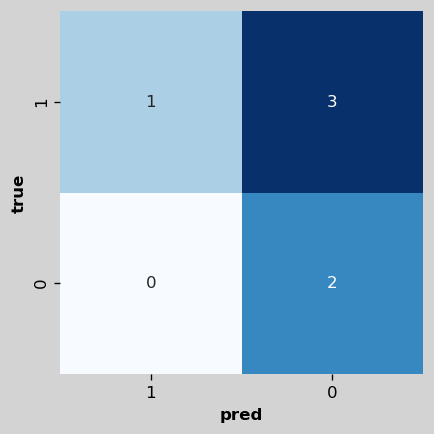

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=120) # 해상도
fig.set_facecolor('lightgray') # 배경색 자체를 바꿔주는 방법
sns.heatmap(result, 
            annot=True, 
            cmap='Blues', # 직관적으로 가져오는 파란색 
            square=True, # 정사각형으로 봤을 때 직관적으로 보기 좋음.
            cbar=False,
            ax=ax)
ax.set_ylabel('true', fontweight='bold')
ax.set_xlabel('pred', fontweight='bold')

ax.invert_xaxis()
ax.invert_yaxis()
plt.show()

FP와 FN의 이유가 무엇일지 고민하는 시간이 반드시 필요하다.
꼭 실제 샘플들을 살펴보고 모델에게 어떤 점이 부족한지 알아야 한다.

결론적으로 여기서 얻을 수 있는 첫번째 metric은 **정확도(accuracy)** 이다.


$$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

`정답 / 전체`로 이해할 수 있다. 하지만 불균형 데이터의 경우는 이 내용이 쉽지 않다. 

이것을 방지하기 위한 metric은 **F1 Score** 다.

$$F_1 = \frac{1}{\frac{1}{recall} + \frac{1}{precision}}$$

여기서 recall은 재현율, precision은 정밀도라 한다.



<div class="alert alert-block alert-warning">
<b>Quiz</b> 정밀도와 재현율을 평가지표인 대회를 만들 수 있을까?
</div>

정답은 ...

In [99]:
from sklearn.metrics import f1_score
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 1, 0, 0]
result = f1_score(y_true, y_pred)

print(result)

0.4


---
# 문제
sklearn을 사용하지 않고 numpy로 `TP, TN, TP, FN`을 계산해봅시다. (15분)

> 내풀이

In [100]:
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_pred = [0, 0, 0, 1, 0, 0, 1, 1, 1, 1]

In [101]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_pred = [0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
result = confusion_matrix(y_true, y_pred)

print("답\n",result)

답
 [[2 3]
 [3 2]]


> 선생님 풀이

In [102]:
y = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0])
p = np.array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [103]:
y = np.array(y_true)
p = np.array(y_pred)

In [104]:
# print(y ==1)
# print(p ==1)
# print((y == 1) & (p ==1))

print(((y==1) & (p==1)).sum())
print(((y==1) & (p==0)).sum())
print(((y==0) & (p==1)).sum())
print(((y==0) & (p==0)).sum())

2
3
3
2


---
---

`accuracy, recall, precision, F1 score`를 계산해봅시다. (10분)

---

In [105]:
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_pred = [0, 0, 0, 1, 0, 0, 1, 1, 1, 1]

In [106]:
y = np.array(y_true)
p = np.array(y_pred)

> 내 풀이

In [107]:
accuracy = np.mean(np.equal(y,p))

right = np.sum(y*p == 1) # 맞은 개수(TP, FN 개수)
print(right)
precision = right/ np.sum(p) # 예측한 것 중에 맞은 것들
print(precision)
recall = right/np.sum(y) # 실제 모든 값 중에 맞은 것들
print(recall)
f1 = 2 * precision*recall / (precision + recall)
print(f1)

2
0.4
0.4
0.4000000000000001


---

> 선생님 답

---
___

<div class="alert alert-block alert-success">
<b>Tips</b> Category가 많아지만 micro, macro, weighted 등 다양한 방법으로 F1 score를 사용하기도 합니다.
</div>



### 1-3. 대회 지표 Logloss

대회에서는 Logloss라는 지표를 사용합니다.

수식을 사용하면 다음과 같습니다.

$$logloss = \frac{1}{N} \sum_{i=1}^N \sum_{m=1}^M y_{i,m}logp_{i,m}$$

i번째 데이터와 클래스 m일 확률을 사용하여 계산합니다.

In [108]:
from sklearn.metrics import log_loss
y_true_onehot = [[0, 1], [0, 1], [1, 0], [1, 0]]
y_pred = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]
log_loss(y_true_onehot, y_pred)

0.9202278211161898

---
`logloss` 직접구현하기 (15분)

In [109]:
y_true_onehot = [[0, 1], [0, 1], [1, 0], [1, 0]]
y_pred = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]

> 내 정답

In [110]:
t = np.array(y_true_onehot)
p = np.array(y_pred)
-t*np.log(p)
(-t * np.log(p)).sum() / len(t)

0.9202278211161898

---

> 쌤 풀이 

In [111]:
# 풀이 1 : 반복문
N, M = 4, 2
logloss = 0

for i in range(N):
    for m in range(M):
        logloss += y_true_onehot[i][m] * np.log(y_pred[i][m])
        
print(-logloss/N)

0.9202278211161898


In [112]:
-(t * np.log(p)).sum() / len(t)

0.9202278211161898

파이썬은 반복문이 상당히 느림.

넘파이는 내부에서는 C를기반으로 반복문이 진행됨.

이중 반복문을 사용하게 되면 10배 이상 빠를 것.

내장함수를 많이 쓰는 게 속도면에서 유리함.

---
---
### 1-4. 그 외 회귀 지표

- MAE(Mean Absolute Error) : 절대값 에러 평균
- RMSE(Root Mean Square Erorr) 

MAE는 각 값의 차의 절대값을 합하여 평균낸 것입니다.

In [113]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
result = mean_absolute_error(y_true, y_pred)

print(result)

0.5


---
직접 MAE 계산해보기 (10분)

In [114]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

> 내 풀이

In [115]:
t = np.array(y_true)
p = np.array(y_pred)

print(np.abs(t-p).mean())

0.5


---
RMSE는 각 값의 차를 제곱하여 합한 후에 root를 취한 값입니다.

In [116]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

직접 RMSE 계산해보기 (10분)

In [117]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

> 내 답변

In [118]:
np.sqrt((t-p)**2).mean()

0.5

> ✅ 슨상님 답변

---
---
## 2. Classification Algorithm

### 2-1. 다양한 ML 분류 알고리즘

경진대회에서는 비교적 적게 쓰기이지만 꼭 알아야 하는 알고리즘입니다.

- [K Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- Linear Regression
- Logistic Regression
- [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

기본 알고리즘을 알아야 하는 이유는 여러가지 입니다.

- 현업에서는 프로토타입을 만들 때 사용할 수 있다.
- 알고리즘이 직관적인 결과를 제공하여 설명할 수 있다.
- 정제된 데이터에서는 기본 알고리즘도 좋은 효과를 낼 수 있다.
- Baseline을 만들 때, 쉽게 사용할 수 있다.
- 복잡한 알고리즘의 토대가 된다.

**실제 경진대회에서 사용하는 알고리즘**

정형데이터 대회에서는 다음 알고리즘이 기본적으로 사용됩니다.

3일차에 진행할 예정이며 이미 배우신 분들은 미리 사용하셔도 좋습니다.

- XGBoost
- LGBM
- Catboost
- TabNet
- DNN based Model

비정형대회에서는 해당 task에 맞는 방법론들이 사용됩니다.

### 2-2. 알고리즘을 사용하기에 앞서...

해당 기본 알고리즘을 호출해봅시다.

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

알고리즘에서 사용하는 몇 가지 파라미터를 꼭 살펴봅시다.

In [120]:
clf = KNeighborsClassifier(n_neighbors=3)
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
clf.fit(X,y)
print(clf.predict(X))

[1 1 2 2]


In [121]:
print(clf.score(X,y))

1.0


In [122]:
print(clf.predict_proba(X)) #  총 개수만큼 나옴. 이걸 사용해서 제출하면 됨.

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]


In [123]:
print(clf.classes_) # 멀티클래스를 구분할 수 있는 것.

[1 2]


이렇게 간단하게 전처리를 합쳐서 파이프라인을 만들 수도있습니다.

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
clf = make_pipeline(StandardScaler(), 
                    SVC(gamma='auto', probability=True))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

### 2-3. RandomForest로 결과만들기

- 범주형 변수는 모두 one-hot encoding으로 바꾸고
- 수치형 변수는 그대로 유지
- RandomForest 모델을 사용하여 제출 1회하기

In [125]:
# pd.get_dummies(data['car'])
# prefix 접두사
pd.get_dummies(data['reality'], prefix='reality', prefix_sep='-')

,reality-N,reality-Y
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
26452,1,0
26453,0,1
26454,1,0
26455,0,1


In [144]:
# train
data_sample = data.copy()

ohe_cats = []
for cat_col in cat_columns:
    ohe_cats.append(pd.get_dummies(data[cat_col], prefix=cat_col, prefix_sep='_'))
    
data_sample = data_sample.join(ohe_cats)
data_sample.drop(cat_columns, axis=1, inplace=True)

data_sample.shape

(26457, 56)

In [145]:
# test
test_sample = test_data.copy()

ohe_cats = []
for cat_col in cat_columns:
    ohe_cats.append(pd.get_dummies(test_data[cat_col], prefix=cat_col, prefix_sep='_'))
    
test_sample = test_sample.join(ohe_cats)
test_sample.drop(cat_columns, axis=1, inplace=True)

test_sample.shape

(10000, 56)

In [146]:
rf = RandomForestClassifier()
rf.fit(data_sample, target)

RandomForestClassifier()

In [147]:
result = rf.predict_proba(test_sample)
result

array([[0.08, 0.16, 0.76],
       [0.37, 0.13, 0.5 ],
       [0.12, 0.22, 0.66],
       ...,
       [0.02, 0.16, 0.82],
       [0.21, 0.43, 0.36],
       [0.11, 0.27, 0.62]])

In [149]:
answer = pd.read_csv(os.path.join(BASE_DIR, 'sample_submission.csv'))
answer

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [150]:
answer['0'] = result[:, 0]
answer['1'] = result[:, 1]
answer['2'] = result[:, 2]
answer

,index,0,1,2
0,26457,0.08,0.16,0.76
1,26458,0.37,0.13,0.50
2,26459,0.12,0.22,0.66
3,26460,0.08,0.28,0.64
4,26461,0.10,0.31,0.59
...,...,...,...,...
9995,36452,0.08,0.36,0.56
9996,36453,0.13,0.37,0.50
9997,36454,0.02,0.16,0.82
9998,36455,0.21,0.43,0.36


In [151]:
answer.to_csv('test.csv', index=False)

강사님 파일 다시봐야함

## 3. Validation

### 3-0. Overfitting & Underfitting

ML에서 발생할 수 있는 문제점의 대표적인 문제는 이것입니다.

**Overfitting을 방지할 수 있는 방법**

1. 데이터 관점에서 더 많은 데이터를 확보하면 된다. 더 다양한 유효한 특성을 공부할 것.
    - 비정형 데이터에서는 data augmentation 등을 진행
2. 모델의 복잡도를 낮춰준다.
    - 신경망이라면 모델의 깊이를 낮춰줄 것
    - 결정트리 기반이라면 depth를 줄일 것 + 가지치기
3. 정규화를 사용한다.
    - Ridg, Lasso 등 정규화 사용하는 모델로 변경해볼 것
4. 앙상블 모델을 사용한다.
    - 여러 모델의 결과를 평균
    
**Underfitting을 방지할 수 있는 방법**

1. 새로운 특성 추가한다.
2. 모델의 복잡도 증가시킨다.
3. 정규화 계수를 줄인다.

---

이런 Overfitting과 Underfitting을 확인하기 위해서는 Leaderboard와 본인의 결과가 잘 비교되야 한다.

그렇기에 검증은 필수적이다.

### 3-1. 검증 (Validataion)

- 모델을 만들면서 가장 중요한 것은 모델이 좋은지 나쁜지 평가해야 한다.
- 이때 이미 학습에 이용한 데이터로 평가하려 해도 모델은 그 정답을 알고 있는 상황!!
- 미지의 데이터에 대한 예측 능력을 평가할 수가 없다.
- 학습데이터 중 일부를 사용하여 미지의 데이터로 남겨두고 이를 검증용으로 사용한다.
- 모니터링 용도로 사용할 수 있다.

큰 분류는 2가지이다.

1. 일부 데이터를 검증용으로 나누는 홀드아웃 방법
2. 전체 데이터를 효과적으로 사용하는 교차 검증 방법

그리고 교차 검증 방법은 다음과 같은 순서로 이뤄진다.

1. 학습 데이터를 여러 개로 분할한다. (이를 fold라고 부름)
2. 그 중 하나를 검증 데이터, 나머지를 학습데이터로 삼아 학습 및 평가를 실시하고 검증 데이터에서 점수를 구한다.
3. 분할한 횟수만큼 검증 데이터를 바꿔가며 2의 내용을 반복한다.
4. 검증 데이터의 평균 점수로 모델의 좋고 나쁨을 평가한다.


![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

- [시각화로 보는 검증](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)

### 3-2. Holdout Set (Train Test Split)

개인적으로 빠르게 해보며 성능을 확인할 수 있다는 장점이 있다.

일반적으로 사용하는 비율은 ...

- 7:3
- 8:2
- 9:1

등이 있습니다.

In [154]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
target_ohe = ohe.fit_transform(target.values.reshape(-1, 1))
ohe.categories_

[array([0., 1., 2.])]

In [155]:
from sklearn.model_selection import train_test_split

y = target.values
X = data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

dt = RandomForestClassifier()
dt.fit(X_train[num_columns], y_train)

pred = dt.predict_proba(X_train[num_columns])
print(log_loss(ohe.transform(y_train.reshape(-1, 1)), pred))

pred = dt.predict_proba(X_val[num_columns])
print(log_loss(ohe.transform(y_val.reshape(-1, 1)), pred))

0.18053693605700252
0.7731586537931222


### 3-3. K-Fold Cross Validation

In [165]:
from sklearn.model_selection import KFold

scores_train = []
scores_val = [] 
kf = KFold(n_splits=5, shuffle=True, random_state=71) # 이런 핵심 기능들을 알아가는게 중요

for ith, (tr_idx, va_idx) in enumerate(kf.split(X)):
    print(f'{ith} step')
    X_train, X_val = data_sample.iloc[tr_idx], data_sample.iloc[va_idx]
    y_train, y_val = y[tr_idx], y[va_idx]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    pred = rf.predict_proba(X_train)
    score_train = log_loss(ohe.transform(y_train.reshape(-1, 1)), pred)
    
    pred = rf.predict_proba(X_val)
    score_val = log_loss(ohe.transform(y_val.reshape(-1, 1)), pred)

    scores_train.append(score_train)
    scores_val.append(score_val)

print(scores_train)
print(np.mean(scores_train))

print(scores_val)
print(np.mean(scores_val))

0 step
1 step
2 step
3 step
4 step
[0.17108639414598845, 0.17118719175663472, 0.17131557181333923, 0.1700234885607041, 0.16920483015114102]
0.17056349528556153
[0.8013988862439133, 0.8060784062322153, 0.7850655359876607, 0.800375191682306, 0.7977567651616826]
0.7981349570615556


### 3-4. Stratified K-Fold Cross Validation

In [171]:
from sklearn.model_selection import StratifiedKFold

scores = []
results = [] 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=71)

for tr_idx, va_idx in skf.split(X, y):
    X_train, X_val = data_sample.iloc[tr_idx], data_sample.iloc[va_idx]
    y_train, y_val = y[tr_idx], y[va_idx]
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_val)
    score = log_loss(ohe.transform(y_val.reshape(-1, 1)), pred)
    
    scores.append(score)
    
    results.append(rf.predict_proba(test_sample))

print(scores)
print(np.mean(scores))

[0.800738840175819, 0.7703297641336846, 0.7969823385132417, 0.791229364216982, 0.7518329940670126]
0.782222660221348


대회 제출을 위해서는 다음과 같이 만들어볼 수 있습니다.

In [172]:
from sklearn.model_selection import StratifiedKFold


scores = [] 
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=71)

for tr_idx, va_idx in skf.split(X, y):
    X_train, X_val = data.iloc[tr_idx], data.iloc[va_idx]
    y_train, y_val = y[tr_idx], y[va_idx]
    rf = RandomForestClassifier()
    rf.fit(X_train[num_columns], y_train)
    pred = rf.predict_proba(X_val[num_columns])
    score = log_loss(ohe.transform(y_val.reshape(-1, 1)), pred)
    scores.append(score)
    
    results.append(rf.predict_proba(test_data[num_columns]))

print(scores)
print(np.mean(scores))

[0.7723961718149581, 0.7755573593037598, 0.7771654227873421, 0.7705273932318863, 0.7617505880923992]
0.771479387046069


In [173]:
result = np.array(results).mean(axis=0)

sample_submission['0'] = result[:, 0]
sample_submission['1'] = result[:, 1]
sample_submission['2'] = result[:, 2]

sample_submission.to_csv('cb5.csv', index=False)

### 3-5. LOOCV

Leave One Out Cross Validation은 Leave-p-Out Cross Validation의 일종입니다.

검증 데이터가 1개씩 사용하는 방법으로 데이터가 적을 때, 효과적인 방법입니다. 

p개씩 하는 LPOCV의 일종이기도 합니다.

시간이 오래걸리므로 추천하지는 않습니다.

In [174]:
from sklearn.model_selection import LeaveOneOut

## 4. Feature Engineering

### 4-1. 다양한 테크닉들

모델보다 중요한 것은 중요한 feature를 찾는 것.
결국엔 언제나 입력을 잘 만들어주는 것이 중요하다.

대회 마지막에 일주일 전에 조지면 됨

- Feature Interaction (aka 사칙연산)
- Dimension Reduction
- Groupby Feature (statistics feature)
- Frequency Encoding
- Target Encoding
- Natural Language Embedding
- Split String
- feature from missing value 
- Clipping

### 4-2. Feature Interaction

feature간의 다양한 연산을 통해 새로운 feature를 만들 수 있습니다.

- 덧셈
- 뺄셈
- 곱셈
- 나눗셈

왜 이 연산들을 통해 새로운 feature를 만들면 좋은 feature를 만들 수 있을까요?

---
다음과 같은 변수들을 만들어봅시다. (후에 제출용으로 만들 때는 test data에도 만들어야 합니다.) (15분)

1. 고용되기 전까지 일수(나이)
2. 나이
3. 소득 / 가족수

In [175]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0


In [179]:
data_sample['first_employed'] = data_sample['DAYS_EMPLOYED'] - data_sample['DAYS_BIRTH']
test_sample['first_employed'] = data_sample['DAYS_EMPLOYED'] - data_sample['family_size']
# 다중공선성이 의심이 될 수 있다. 다 만들고 체크를 하고 지워주면 됨.


In [180]:
data_sample['age'] = data_sample['DAYS_BIRTH'] / 365
test_sample['age'] = data_sample['DAYS_BIRTH'] / 365

In [181]:
data_sample['income_per'] = data_sample['income_total'] / data_sample['family_size']
test_sample['income_per'] = data_sample['income_total'] / data_sample['family_size']


### 4-3. Dimension Reduction & Clustering

Dimension Reduction은 차원을 줄이는 방법으로 다양한 방법이 존재합니다.

차원을 줄이는 이유는 다양합니다.

1. feature가 너무 많을 때, 효과적인 feature를 찾기 위해 (고차원->저차원)
2. noise 제거 및 성능 향상
2. 시각화를 통해 고차원 데이터 분포

Dimension Reduction은 꾸준하게 연구되고 있으며 현재 가장 많이 사용하는 방법은 다음과 같습니다.

- PCA

주성분 분석이라는 방법입니다.

- T-SNE / UMAP

구체적인 방법을 설명하기는 비교적 어렵습니다. 

멀리있는 데이터는 멀리보네고, 가까이 있는 데이터는 가깝게 유지하는 방법을 사용하여 데이터의 분포를 저차원에서 줄입니다.


#### Further Reading

- [T-SNE 이론적 설명](https://lovit.github.io/nlp/representation/2018/09/28/tsne/)
- [How to use t-sne Effectively](https://distill.pub/2016/misread-tsne/)

In [182]:
# !pip install umap-learn

In [183]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

pca = PCA(n_components=2)
tsne = TSNE(n_components=2,random_state=0)
umap = UMAP(random_state=0)

각각 pca, tsne, umap은 `scaler`나 `classifier`와 마찬가지로 `fit`과 `transform` 기능을 가지고 있습니다.

train data의 numerical columns에 대해 pca의 결과, tsne의 결과, umap의 결과를 다른 파일에 저장하시오. (15분)

### 4-4. Groupby Feature (Statistics)

앞서 말한 방법의 심화입니다. Groupby를 사용한 다양한 통계값을 사용하여 새로운 feature를 만들어줄 수 있습니다.

In [187]:
data.groupby(['gender'])['child_num'].mean()

gender
F    0.388314
M    0.510160
Name: child_num, dtype: float64

In [189]:
data.groupby(['gender'])['child_num'].transform(np.mean) # 하나의 시리즈를 만듦.
# categorical columns를 numerical로 바꾸면서 
# 모델의 성능을 높이는 것을 고민.

0        0.388314
1        0.388314
2        0.510160
3        0.388314
4        0.388314
           ...   
26452    0.388314
26453    0.388314
26454    0.388314
26455    0.510160
26456    0.388314
Name: child_num, Length: 26457, dtype: float64

<div class="alert alert-block alert-warning">
<b>Quiz</b> 평균을 쓰는 것이 정답일까?
</div>


### 4-5. Frequency Encoding

프리퀀시 인코딩은 각 레벨의 출현 횟수의 혹슨 출현 비노도로 범주형 변수를 대체하는 방법입니다.

각 레벨의 출현빈도가 target과 관련성이 있을 때 유효합니다. 즉, 균등하다면 의미가 없습니다.

다음과 같이 진행할 수 있습니다.

``` py
for c in cat_columns:
    freq = train[c].value_counts()
    train[c] = train[c].map(freq)
    test[c] = test[c].map(freq)
```

해당 과정을 train data와 test data에 모두 적용해보시오 (10분)

### 4-6. Target Encoding

목적변수를 이용하여 범주형 변수를 수치형 변수로 변환하는 방법입니다.

범주형 변수의 각 클래스별로 target의 평균값으로 치환하여 사용합니다.

- target의 정보가 노출되기 때문에 KFold를 사용
- noise를 더하여 누출을 방지
- 불균형 방지를 위해 데이터 평균 및 가중치 추가

고려할 부분이 상당히 많음.

In [191]:
data = pd.read_csv(train_path)
data.groupby('gender')['credit'].mean()
# 위험한 방법
# 평균을 더해 분포를 바꾸는 경우 

gender
F    1.518788
M    1.521119
Name: credit, dtype: float64

In [190]:
# !pip install category_encoders

In [ ]:
from category_encoders.target_encoder import TargetEncoder

te = TargetEncoder()
te.fit(data['gender'], target)

<div class="alert alert-block alert-warning">
<b>Quiz</b> 해당 target은 0, 1, 2이기에 평균이 의미가 없을 수 있다. 어떻게 하면 좋은 Feature를 만들 수 있을까?
</div>


### 4-7. Split String Feature 

일부 hash값으로 구성된 string의 경우, string을 쪼개어 숫자부/문자부 등으로 구분하여 사용할 수 있습니다.

<div class="alert alert-block alert-success">
<b>Tips</b> 2021-07-31의 경우, 2021과 07을 사용할 수 있다.
</div>


### 4-8. Natural Language Embedding

자연어가 포함되어 있는 경우에 이를 vector로 표현하는 것도 하나의 방식입니다.

- Word2Vec # 
- TF-IDF  # 빈도수
- FastText # 심화시킨 것
- Bert # 딥러닝 방법

등의 자연어 처리 방법론이 있습니다.
일반적으로 `설명` feature가 있어 해당 설명을 모델에 넣기위해 사용합니다.


[한국-서울+도쿄](https://word2vec.kr/search/?query=%ED%95%9C%EA%B5%AD-%EC%84%9C%EC%9A%B8%2B%EB%8F%84%EC%BF%84) 처럼 연산을 할 수 있다.

좀 더 좋은 퀄리티의 [구글 자료](http://projector.tensorflow.org/)을 살펴봅시다.

#### Further Reading

- https://wikidocs.net/book/2155

### 4-9. Feature from Missing Value

결측치가 있다면 결측치가 있음을 1로, 결측치가 없음은 0으로 추가할 수도 있습니다. 

Occyp의 빈부분을 결측치가 있는 경우 1, 없는 경우 0으로 만들어보시오. (10분)

### 4-10. Clipping

Scaling이 완료되었거나 범위가 극단적인 경우는 양끝을 잘라줄 수도 있습니다.

가족 수에 관련된 feature를 본인의 기준에 따라 N명 이상인 경우는 N명으로 바꾸시오. 그리고 스케일링하시오. (15분)

## Further Reading

- category encoding : https://www.kaggle.com/c/cat-in-the-dat/overview

## 5. 오늘의 목표 (30분)

1. 범주형 변수 인코딩
2. 수치형 변수와 범주형 변수를 통한 변수 생성
3. Stratified KFold + 본인이 ML에서 선택하고 싶은 모델로 모델 생성
4. 모델의 결과를 평균 내고 제출